# Pandas Test - Real life exercise

In [1]:
import pandas as pd
import numpy as np

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
216187,2021-week_48,AD07PKDS8N,RelayFoods,DE,no,True,Qality,DNNQ
40347,2021-week_35,AD06XX8FVN,Tab Solutions,US,yes,NaN,Qality,DNNQ
220936,2021-week_48,AD0778L8HN,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY
277311,2022-week_01,AD07J9MNNN,Puentes Company,IN,yes,NaN,Yield,UserPopY
76541,2021-week_38,AD07NL7SV8,Search Million Culture,GB,yes,NaN,Qality,RNNQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column

#### q01- Add a column with the sample year

In [4]:
ad_recs_annotated['sample_year'] = ad_recs_annotated.week_id.str[0:4].astype(int)
ad_recs_annotated.sample_year.sample(5).to_frame()

,sample_year
13609,2021
279711,2022
170701,2021
189003,2021
74011,2021


#### q02- Add a column with the sample quarter (google how to)

In [5]:
week_number  = ad_recs_annotated.week_id.str[10:12].astype(int) 
ad_recs_annotated['sample_quarte'] = ((week_number-1) // 13) + 1
ad_recs_annotated.sample_quarte.sample(5).to_frame()

,sample_quarte
371105,4
201722,4
4232,3
373055,4
57523,3


#### q03- Add a new success column with values 1 and 0 for yes and no 

In [6]:
ad_recs_annotated['success_column_0_or_1'] = ad_recs_annotated.is_success.apply(lambda x:1 if  x == 'yes' else 0) 
ad_recs_annotated.success_column_0_or_1.sample(5).to_frame()

,success_column_0_or_1
187290,1
143104,1
172654,0
259069,0
170431,1


#### q04- Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

#### q05a- Are there any NaNs in the is_sever column? 

In [7]:
ad_recs_annotated.is_sever.isnull().sum()

304195

yes there are 304195 any NaNs in the is_sever column

#### q05ab- Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 

In [8]:
ad_recs_annotated['is_sever_false'] = ad_recs_annotated.is_sever.fillna('False')
ad_recs_annotated.is_sever_false.isnull().sum()

0

ckeck ok

#### q06- Capitlize (first letter only) the is_success column

In [9]:
ad_recs_annotated['is_success'] = ad_recs_annotated.is_success.apply(lambda is_success: (is_success[0].upper()+is_success[1:]))
ad_recs_annotated.is_success.sample(5).to_frame()

,is_success
328454,Yes
343393,Yes
110034,Yes
15109,Yes
325527,Yes


### Subsetselection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### q01 - How many requests are there in US region?


In [10]:
print(ad_recs_annotated[ad_recs_annotated['region'] == 'US'].shape[0])
ad_recs_annotated.query("region == 'US'").shape[0]


103846


103846

#### q02 - How many successful requests are there in US region?

In [11]:
print(ad_recs_annotated[(ad_recs_annotated['region'] == 'US') & 
                      (ad_recs_annotated['success_column_0_or_1'] == 1)].shape[0])
ad_recs_annotated.query("region == 'US' and success_column_0_or_1 == 1").shape[0] 


88918


88918

#### q03 - How many successful requests are there in US region, on week 52?

In [12]:
ad_recs_annotated['week_number'] = ad_recs_annotated.week_id.str[10:12].astype(int)
print(ad_recs_annotated[(ad_recs_annotated['region'] == 'US') &
                        (ad_recs_annotated['success_column_0_or_1'] == 1) &
                        (ad_recs_annotated['week_number'] == 52)
                        ].shape[0])
ad_recs_annotated.query("region == 'US' and success_column_0_or_1 == 1 and week_number == 52").shape[0]


3342


3342

#### q04 - How many requests where delivered by DDNQ, RRNY and UserPopQ together?

In [13]:
print(ad_recs_annotated[(ad_recs_annotated['rec_provider'] == 'DNNQ') |
                        (ad_recs_annotated['rec_provider'] == 'RNNY') |
                        (ad_recs_annotated['rec_provider'] == 'UserPopQ')].shape[0])
ad_recs_annotated.query("rec_provider == 'DNNQ' or rec_provider == 'RNNY' or rec_provider == 'UserPopQ'").shape[0] 


200093


200093

#### q05 - How many requests where delivered by rule based providers?

In [14]:
print(ad_recs_annotated[(ad_recs_annotated['rec_provider'] == 'RuleBasedY') |
                        (ad_recs_annotated['rec_provider'] == 'RuleBased')].shape[0])
ad_recs_annotated.query('rec_provider == "RuleBasedY" or rec_provider == "RuleBased"').shape[0]

28336


28336

#### q06 -Select only the requests from 2021 - How many are there? 

In [15]:
print(ad_recs_annotated[ad_recs_annotated['sample_year'] == 2021].shape[0])
ad_recs_annotated.query('sample_year == 2021').shape[0]

271615


271615

#### q07 -Select the reqeusts from week 30 to week 40 - How many are there? 

In [16]:
print(ad_recs_annotated[(ad_recs_annotated['week_number'] <= 40) &
                        (ad_recs_annotated['week_number'] >= 30) 
                       ].shape[0])
ad_recs_annotated.query('week_number >= 30 and week_number <= 40').shape[0]

115051


115051

#### q08 -Select all the data that comes from the most popular Ad

In [17]:
max_ad_id = ad_recs_annotated.ad_id.value_counts().index[0]
print(max_ad_id)
ad_recs_annotated[ad_recs_annotated.ad_id == max_ad_id]
ad_recs_annotated.query('ad_id == @max_ad_id').sample(5)

AD07PFFMP9


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number
135450,2021-week_42,AD07PFFMP9,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2021,4,1,False,42
135455,2021-week_42,AD07PFFMP9,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2021,4,1,False,42
306071,2022-week_03,AD07PFFMP9,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2022,1,1,False,3
106563,2021-week_40,AD07PFFMP9,Search Million Culture,IN,Yes,NaN,Qality,ManualQ,2021,4,1,False,40
149891,2021-week_43,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2021,4,1,False,43


#### q09 -Select all the data that comes from the least popular provider

In [18]:
least_popular_provider = ad_recs_annotated.rec_provider.value_counts().index[-1]
print(least_popular_provider)
ad_recs_annotated[ad_recs_annotated.rec_provider == least_popular_provider]
ad_recs_annotated.query('rec_provider == @least_popular_provider').sample(5)

UserPopSelectionY


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number
353456,2022-week_06,AD078P688Q,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
353326,2022-week_06,AD06ZY9YJC,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
353551,2022-week_06,AD07GPW9QV,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False,6


#### q10 -Select the data in which is_sever is None. How big is it?

In [19]:
ad_recs_annotated[ad_recs_annotated.is_sever.isnull()].shape[0]
print(ad_recs_annotated.query('is_sever != is_sever').shape[0])
ad_recs_annotated.query('is_sever != is_sever').sample(5)

304195


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number
82474,2021-week_38,AD00FMWWN6,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,3,1,False,38
17393,2021-week_34,AD07TTXXFY,Fry Multimedia,GB,Yes,NaN,Qality,DNNQ,2021,3,1,False,34
13793,2021-week_33,AD08887LCZ,Search Million Culture,US,Yes,NaN,Qality,RNNQ,2021,3,1,False,33
189742,2021-week_46,AD00IXNW9K,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2021,4,1,False,46
283413,2022-week_01,AD088Y68P9,Fancy,US,Yes,NaN,Qality,DNNQ,2022,1,1,False,1


#### q11- Select the data in which the requester is a 3 word company

In [20]:
ad_recs_annotated['word_company_len'] = ad_recs_annotated.requester.str.split().apply(lambda x: len(x))
                                                                          
ad_recs_annotated[ad_recs_annotated.word_company_len == 3].shape[0]
print(ad_recs_annotated.query('word_company_len == 3').shape[0])
ad_recs_annotated.query('word_company_len == 3').sample(5)


118141


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number,word_company_len
204407,2021-week_47,AD08MDTWPM,Search Million Culture,GB,Yes,NaN,Qality,DNNQ,2021,4,1,False,47,3
6031,2021-week_33,AD08H68888,Search Million Culture,IN,No,True,Qality,UserPopQ,2021,3,0,True,33,3
122039,2021-week_41,AD07FKWKZ6,Search Million Culture,IN,No,False,Qality,UserPopQ,2021,4,0,False,41,3
273661,2022-week_01,AD09GYK7W8,Search Million Culture,DE,No,True,Qality,DNNQ,2022,1,0,True,1,3
344355,2022-week_06,AD09D86Z8J,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2022,1,1,False,6,3



#### q12- Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it


In [21]:
def ad_id_has_the_letter_6(x):
    list(x)
    for i in x:
        if i =='6':
            return 1
    return 0 

In [22]:
letter_6_in_ad_id = ad_recs_annotated.ad_id.apply(ad_id_has_the_letter_6)

In [23]:
ad_recs_annotated[(ad_recs_annotated.word_company_len == 3) & letter_6_in_ad_id ].shape[0]
ad_recs_annotated[(ad_recs_annotated.word_company_len == 3) & letter_6_in_ad_id ].sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number,word_company_len
23630,2021-week_34,AD08SQ68YP,Search Million Culture,JP,Yes,NaN,Qality,DNNQ,2021,3,1,False,34,3
245523,2021-week_50,AD08MS6M8G,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,4,1,False,50,3
125245,2021-week_41,AD08WQW66Q,Search Million Culture,JP,Yes,NaN,Qality,DNNQ,2021,4,1,False,41,3
232618,2021-week_49,AD00FJ6D7A,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2021,4,1,False,49,3
43315,2021-week_36,AD076CDK6K,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,36,3


#### q13- Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [24]:
from functools import reduce

def multiplication_bigger_than_30(x):
    list(x)
    digits = []
    for i in x:
        if i.isdigit():
            digits.append(i) 
    digits = [int(k) for k in digits]      
    return reduce((lambda x, y: x * y), digits)

multiplication_bigger_than_30 = ad_recs_annotated.ad_id.apply(multiplication_bigger_than_30)

ad_recs_annotated[(ad_recs_annotated.word_company_len == 3) & multiplication_bigger_than_30 ].shape[0]

0

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


#### q1- How many weeks available in the data? Are there any missing weeks? 

In [25]:
ad_recs_annotated.week_id.value_counts().sort_index().to_frame()


,week_id
2021-week_33,14356
2021-week_34,14371
2021-week_35,14373
2021-week_36,14390
2021-week_37,14392
2021-week_38,14347
2021-week_39,14416
2021-week_40,14406
2021-week_41,14380
2021-week_42,14376


there is missing data - week 52 

#### q2- How many regions available in the data? Are there any missing weeks per region? 

In [26]:

missing_weeks_per_region = ad_recs_annotated.groupby(['region','week_id']).size().unstack('region').isnull().sum()

missing_weeks_per_region.to_frame()

,0
region,
DE,0
GB,0
IN,0
JP,1
US,0


#### q3- How many ads are being sent to annotation in each region per week?

In [27]:
pd.DataFrame(ad_recs_annotated.groupby(['region','week_id']).sum().success_column_0_or_1).unstack('week_id')

success_column_0_or_1                                         \
week_id          2021-week_33 2021-week_34 2021-week_35 2021-week_36   
region                                                                 
DE                     1930.0       1883.0       1931.0       1909.0   
GB                     2702.0       2681.0       2744.0       2689.0   
IN                     2341.0       2424.0       2426.0       2458.0   
JP                     1113.0       1117.0       1127.0       1122.0   
US                     3528.0       3511.0       3501.0       3537.0   

                                                                          \
week_id 2021-week_37 2021-week_38 2021-week_39 2021-week_40 2021-week_41   
region                                                                     
DE            1938.0       1934.0       1994.0       1917.0       1954.0   
GB            2711.0       2671.0       2571.0       2602.0       2661.0   
IN            2438.0       2450.0       2456.0       2452.0       2456.0   
JP            1154.0       1096.0       1133.0       1154.0       1196.0   
US            3463.0       3402.0       3483.0       3492.0       3471.0   

                      ...                                                      \
week_id 2021-week_42  ... 2021-week_49 2021-week_50 2021-week_51 2022-week_01   
region                ...                                                       
DE            1922.0  ...       1966.0       1994.0       1941.0       1972.0   
GB            2627.0  ...       2682.0       2686.0       2640.0       2668.0   
IN            2442.0  ...       2462.0       2447.0       2394.0       2379.0   
JP            1242.0  ...       1246.0       1293.0          NaN       1298.0   
US            3446.0  ...       3417.0       3383.0       3289.0       3330.0   

                                                                          \
week_id 2022-week_02 2022-week_03 2022-week_04 2022-week_05 2022-week_06   
region                                                                     
DE            2014.0       1979.0       2017.0       2015.0       2020.0   
GB            2650.0       2608.0       2620.0       2605.0       2714.0   
IN            2404.0       2450.0       2468.0       2411.0       2389.0   
JP            1296.0       1280.0       1270.0       1320.0       1281.0   
US            3360.0       3313.0       3321.0       3342.0       3354.0   

                      
week_id 2022-week_52  
region                
DE            1937.0  
GB            2646.0  
IN            2428.0  
JP            2560.0  
US            3342.0  

[5 rows x 26 columns]

#### q4- How many None values are there in is_sever column? 

In [28]:
ad_recs_annotated.is_sever.value_counts(dropna=False)[0]

304195

#### q5- Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)

In [29]:
ad_id_most_in_week = pd.DataFrame(ad_recs_annotated.groupby(['week_id']).ad_id.value_counts())
print(ad_id_most_in_week.idxmax())
ad_id_most_in_week.max()

ad_id    (2021-week_40, AD098SWYF6)
dtype: object


ad_id    81
dtype: int64

#### q6- Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [30]:
sent_more_than_one_week = ad_recs_annotated.groupby('ad_id').week_id.count()
sent_most_amount_of_weeks = sent_more_than_one_week.idxmax()
sent_most_amount_of_weeks


'AD07PFFMP9'

In [31]:
ad_recs_annotated.groupby('ad_id').week_id.value_counts().to_frame()



week_id
ad_id      week_id              
AD00000088 2021-week_37        1
AD000000WF 2022-week_03        1
AD00000876 2021-week_34        1
AD00000888 2021-week_43        1
           2022-week_02        1
...                          ...
AD98988898 2021-week_43        1
           2022-week_05        1
AD99798888 2021-week_42        1
ADOO8X898E 2021-week_41        1
           2021-week_50        1

[358763 rows x 1 columns]

#### q7- When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 

#### q8- Per each region, What is the Quality/Yield traffic proportion WoW? 

In [32]:
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,sample_quarte,success_column_0_or_1,is_sever_false,week_number,word_company_len
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33,3
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False,33,3
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33,3
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False,33,3
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False,33,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,4,1,False,52,2
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,4,1,False,52,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,4,1,False,52,2
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,4,1,False,52,1


#### q9- How many different reqeusters are there? 

In [33]:
len(ad_recs_annotated.requester.unique())

36

#### q10- Which are the top 5 requesters per region? 

In [34]:
ad_recs_annotated.groupby('region').requester.apply(lambda grp: grp.head(5)).to_frame()


requester
region                              
DE     0      Search Million Culture
       1       MoJoe Brewing Company
       2      Search Million Culture
       3      Search Million Culture
       4      Search Million Culture
GB     2395    MoJoe Brewing Company
       2396                    Fancy
       2397    MoJoe Brewing Company
       2398                    Fancy
       2399    MoJoe Brewing Company
IN     5575          Puentes Company
       5576          Puentes Company
       5577          Puentes Company
       5578   Search Million Culture
       5579          Puentes Company
JP     8771   Search Million Culture
       8772   Search Million Culture
       8773   Search Million Culture
       8774           LocalVox Media
       8775   Search Million Culture
US     10382              Extreme DA
       10383           Tab Solutions
       10384           Tab Solutions
       10385                   Fancy
       10386                   Fancy

#### q11- Which are the different rec_proivders?

In [35]:
 pd.DataFrame(ad_recs_annotated.rec_provider.unique())

,0
0,DNNQ
1,DNNY
2,BooksQ
3,UserPopQ
4,UserPopY
5,RuleBasedY
6,ManualY
7,ManualQ
8,BooksY
9,XGBQ


#### q12- Are there different rec providers per region? 

In [36]:
ad_recs_annotated.groupby('region').rec_provider.nunique().to_frame().reset_index()

,region,rec_provider
0,DE,9
1,GB,12
2,IN,6
3,JP,9
4,US,14


#### q13- Are there different rec providers per rec type?

In [37]:
ad_recs_annotated.groupby('rec_provider').recommendation_type.nunique().reset_index().query('recommendation_type != 1')

,rec_provider,recommendation_type
4,ManualQ,2
5,ManualY,2


#### q14- What are the notation rules distinguishing between quality vs yielding providers?

In [38]:
ad_recs_annotated.groupby(['rec_provider','recommendation_type']).recommendation_type.count().to_frame()

recommendation_type
rec_provider      recommendation_type                     
BooksQ            Qality                              1720
BooksY            Yield                               4150
DNNQ              Qality                            117424
DNNY              Yield                              45116
ManualQ           Qality                             10220
                  Yield                               3624
ManualY           Qality                              1439
                  Yield                                543
RNNQ              Qality                             20983
RNNY              Yield                              12732
RuleBased         Qality                               182
RuleBasedY        Yield                              28154
UserPopQ          Qality                             69937
UserPopSelectionQ Qality                              2417
UserPopSelectionY Yield                                 21
UserPopY          Yield                              38600
XGBQ              Qality                             12250
XGBY              Yield                               4276

#### q15- Which is the most successful region of operation?

In [39]:
ad_recs_annotated.groupby('region').is_success.value_counts().idxmax()[0]

'US'

#### q16- Which is the most successful rec provider per each region?

In [40]:
ad_recs_annotated.groupby(['region','rec_provider']).is_success.value_counts().groupby(level=0).idxmax().str[1].to_frame()

,is_success
region,
DE,DNNQ
GB,DNNQ
IN,UserPopQ
JP,DNNQ
US,DNNY


#### q17- Present a table with a success rate, sever defects rate and CI (for each metric) per region

In [41]:
ad_recs_annotated.success_column_0_or_1.std(skipna = False)
a=np.array([[1,4,7,10],[2,5,8,11]])  
b=np.std(a)  
b  

b1 = np.mean(a)
b1



6.0

In [42]:
np.sqrt(5)

2.23606797749979

In [43]:
df1=ad_recs_annotated.groupby('region').is_success.value_counts(normalize=True).unstack('is_success')#['yes']#.rename('success_rate').to_frame()
df1['sample_size']=ad_recs_annotated.groupby('region').is_success.count()
df1

is_success,No,Yes,sample_size
region,,,
DE,0.185808,0.814192,62177
GB,0.162381,0.837619,82984
IN,0.238100,0.761900,83154
JP,0.236073,0.763927,41627
US,0.143751,0.856249,103846


In [97]:
def calc_ci(sub_series):   
    mu = sub_series.mean()
    sigma = np.sqrt(mu*(1-mu)/len(sub_series))
    upper_bound = round(mu + 1.96 * sigma, 6)
    lower_bound = round(mu - 1.96 * sigma,6)
    range_CI = round(1.96*2*sigma,6)
    return ( upper_bound, lower_bound, range_CI )


In [98]:
def rate_and_ci_groupby(df, column1 ,column2 = 0,column3 = 0):
    if column2 == 0 and column3 == 0 :
        df1 = df.groupby(column1).is_sever.mean().reset_index().rename(columns={ 'is_sever': "sever_rate"})
        df2 = df.groupby(column1).is_sever.apply(calc_ci).reset_index().rename(columns={ 'is_sever': "sever_CI_lower_upper_range"})
        df3 = df.groupby(column1).success_column_0_or_1.mean().reset_index().rename(columns={"success_column_0_or_1": "success_rate"})
        df4 = df.groupby(column1).success_column_0_or_1.apply(calc_ci).reset_index().rename(columns={ "success_column_0_or_1": "success_CI_lower_upper_range"})
        data_frames = [df1, df2, df3, df4]    
        df_merged = reduce(lambda  left,right: pd.merge(left,right,on=[column1]), data_frames)
        
    if column2 != 0 and column3 == 0 :
        df1 = df.groupby([column1,column2]).is_sever.mean().reset_index().rename(columns={ 'is_sever': "sever_rate"})
        df2 = df.groupby([column1,column2]).is_sever.apply(calc_ci).reset_index().rename(columns={ 'is_sever': "sever_CI_lower_upper_range"})
        df3 = df.groupby([column1,column2]).success_column_0_or_1.mean().reset_index().rename(columns={"success_column_0_or_1": "success_rate"})
        df4 = df.groupby([column1,column2]).success_column_0_or_1.apply(calc_ci).reset_index().rename(columns={ "success_column_0_or_1": "success_CI_lower_upper_range"})
        data_frames = [df1, df2, df3, df4]
        df_merged = reduce(lambda  left,right: pd.merge(left,right,on=[column1,column2]), data_frames)
        
    if  column3 != 0 :
        df1 = df.groupby([column1,column2,column3]).is_sever.mean().reset_index().rename(columns={ 'is_sever': "sever_rate"})
        df2 = df.groupby([column1,column2,column3]).is_sever.apply(calc_ci).reset_index().rename(columns={ 'is_sever': "sever_CI_lower_upper_range"})
        df3 = df.groupby([column1,column2,column3]).success_column_0_or_1.mean().reset_index().rename(columns={"success_column_0_or_1": "success_rate"})
        df4 = df.groupby([column1,column2,column3]).success_column_0_or_1.apply(calc_ci).reset_index().rename(columns={ "success_column_0_or_1": "success_CI_lower_upper_range"})
        data_frames = [df1, df2, df3, df4]
        df_merged = reduce(lambda  left,right: pd.merge(left,right,on=[column1,column2,column3]), data_frames)
        
    return df_merged.round(5)

In [99]:
rate_and_ci_groupby(ad_recs_annotated,'region' )


,region,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range
0,DE,0.61120,"(0.615029, 0.607366, 0.007663)",0.81419,"(0.817249, 0.811134, 0.006115)"
1,GB,0.73679,"(0.739788, 0.733795, 0.005993)",0.83762,"(0.840129, 0.83511, 0.005019)"
2,IN,0.59258,"(0.595917, 0.589238, 0.006679)",0.76190,"(0.764795, 0.759005, 0.00579)"
3,JP,0.65707,"(0.661627, 0.652507, 0.00912)",0.76393,"(0.768007, 0.759848, 0.008159)"
4,US,0.63661,"(0.639539, 0.633688, 0.005851)",0.85625,"(0.858383, 0.854115, 0.004268)"


#### q18- Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider

In [100]:
rate_and_ci_groupby( ad_recs_annotated,'rec_provider' )

,rec_provider,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range
0,BooksQ,0.09964,"(0.1138, 0.085489, 0.028311)",0.83663,"(0.8541, 0.819156, 0.034944)"
1,BooksY,0.26190,"(0.275282, 0.248528, 0.026754)",0.97976,"(0.984044, 0.975474, 0.008569)"
2,DNNQ,0.84055,"(0.842642, 0.838454, 0.004188)",0.85838,"(0.860371, 0.856382, 0.003989)"
3,DNNY,0.75656,"(0.760516, 0.752596, 0.00792)",0.88671,"(0.889639, 0.88379, 0.005849)"
4,ManualQ,0.52615,"(0.534471, 0.517836, 0.016635)",0.95319,"(0.956711, 0.949674, 0.007037)"
5,ManualY,0.52941,"(0.551386, 0.507437, 0.043949)",0.90565,"(0.91852, 0.892782, 0.025739)"
6,RNNQ,0.75550,"(0.761317, 0.749686, 0.011631)",0.90254,"(0.906553, 0.898527, 0.008026)"
7,RNNY,0.62109,"(0.62952, 0.612667, 0.016853)",0.91965,"(0.924373, 0.914929, 0.009444)"
8,RuleBased,1.00000,"(1.0, 1.0, 0.0)",0.96703,"(0.992974, 0.941092, 0.051881)"
9,RuleBasedY,0.52626,"(0.532091, 0.520426, 0.011665)",0.57455,"(0.58033, 0.568779, 0.011551)"


#### q19- Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations

In [101]:
rate_and_ci_groupby( ad_recs_annotated,'rec_provider','region')

,rec_provider,region,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range
0,BooksQ,DE,0.09594,"(0.111634, 0.080248, 0.031386)",0.79970,"(0.82103, 0.778378, 0.042652)"
1,BooksQ,US,0.20000,"(0.240924, 0.159076, 0.081849)",0.97275,"(0.989409, 0.956095, 0.033314)"
2,BooksY,DE,0.23810,"(0.261641, 0.214549, 0.047092)",0.96659,"(0.976522, 0.956652, 0.01987)"
3,BooksY,US,0.28571,"(0.302176, 0.269252, 0.032924)",0.98548,"(0.989841, 0.981124, 0.008717)"
4,DNNQ,DE,0.76341,"(0.768035, 0.758785, 0.009251)",0.83911,"(0.843113, 0.835116, 0.007998)"
5,DNNQ,GB,0.86902,"(0.872336, 0.865697, 0.00664)",0.87413,"(0.877391, 0.870863, 0.006528)"
6,DNNQ,JP,0.90027,"(0.904015, 0.896522, 0.007493)",0.81847,"(0.823286, 0.813647, 0.009639)"
7,DNNQ,US,0.83751,"(0.842527, 0.832486, 0.010041)",0.90565,"(0.909629, 0.901672, 0.007956)"
8,DNNY,DE,0.60403,"(0.617051, 0.591003, 0.026048)",0.91730,"(0.924632, 0.909963, 0.01467)"
9,DNNY,GB,0.78412,"(0.79358, 0.774668, 0.018911)",0.85797,"(0.865991, 0.849945, 0.016046)"


#### q20- Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)

In [102]:
rate_and_ci_groupby(ad_recs_annotated,'recommendation_type')

,recommendation_type,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range
0,Qality,0.64575,"(0.647682, 0.643827, 0.003855)",0.83091,"(0.83242, 0.829399, 0.003021)"
1,Yield,0.63727,"(0.639814, 0.634726, 0.005088)",0.78443,"(0.786603, 0.782252, 0.004352)"


#### q21- Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region

In [103]:
rate_and_ci_groupby(ad_recs_annotated,'recommendation_type', 'region')

,recommendation_type,region,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range
0,Qality,DE,0.62819,"(0.63241, 0.623963, 0.008448)",0.80668,"(0.810132, 0.803229, 0.006903)"
1,Qality,GB,0.72367,"(0.726993, 0.720339, 0.006654)",0.85037,"(0.853021, 0.847713, 0.005308)"
2,Qality,IN,0.45896,"(0.463797, 0.454132, 0.009665)",0.80613,"(0.809963, 0.802296, 0.007667)"
3,Qality,JP,0.70464,"(0.709391, 0.699896, 0.009496)",0.77781,"(0.782132, 0.77348, 0.008653)"
4,Qality,US,0.73785,"(0.742126, 0.733564, 0.008561)",0.89907,"(0.902002, 0.896138, 0.005864)"
5,Yield,DE,0.52079,"(0.52977, 0.511805, 0.017965)",0.84599,"(0.852476, 0.839495, 0.012981)"
6,Yield,GB,0.78091,"(0.787863, 0.773949, 0.013913)",0.77248,"(0.779527, 0.765425, 0.014102)"
7,Yield,IN,0.68162,"(0.686055, 0.677176, 0.008879)",0.71919,"(0.723468, 0.714903, 0.008565)"
8,Yield,JP,0.46427,"(0.476724, 0.451811, 0.024913)",0.68399,"(0.6956, 0.672376, 0.023224)"
9,Yield,US,0.59838,"(0.602195, 0.594557, 0.007638)",0.82881,"(0.831747, 0.825877, 0.005869)"


#### q22- Present WoW table/graph with success rate and CI (see image below) per region

In [104]:
import plotly.express as px

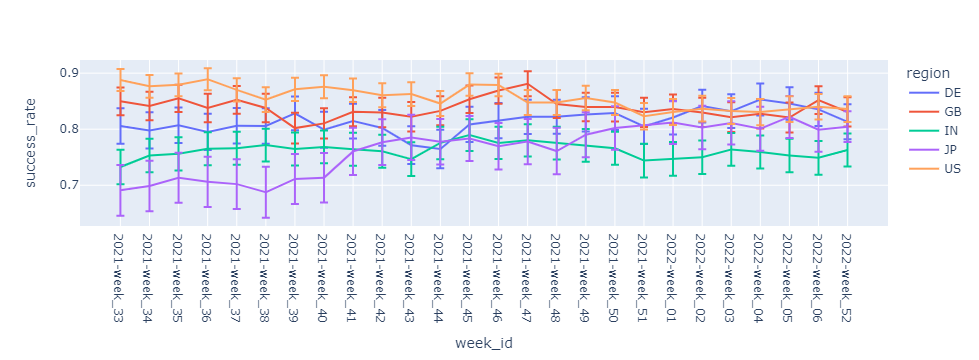

,region,week_id,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range,success_CI_rang
0,DE,2021-week_33,0.59442,"(0.614085, 0.574756, 0.039329)",0.80585,"(0.821687, 0.790004, 0.031683)",0.031683
1,DE,2021-week_34,0.64990,"(0.66914, 0.63065, 0.03849)",0.79788,"(0.814083, 0.781679, 0.032404)",0.032404
2,DE,2021-week_35,0.60043,"(0.620057, 0.580807, 0.03925)",0.80694,"(0.822751, 0.791122, 0.031629)",0.031629
3,DE,2021-week_36,0.56795,"(0.587766, 0.548137, 0.039629)",0.79509,"(0.811231, 0.77894, 0.032291)",0.032291
4,DE,2021-week_37,0.57940,"(0.599133, 0.559665, 0.039468)",0.80616,"(0.821959, 0.790354, 0.031605)",0.031605
...,...,...,...,...,...,...,...
124,US,2022-week_03,0.58559,"(0.600892, 0.570279, 0.030613)",0.83262,"(0.844221, 0.821022, 0.023199)",0.023199
125,US,2022-week_04,0.64454,"(0.659378, 0.629707, 0.029671)",0.83046,"(0.842088, 0.818828, 0.02326)",0.023260
126,US,2022-week_05,0.62195,"(0.636982, 0.60692, 0.030062)",0.83592,"(0.847398, 0.824438, 0.02296)",0.022960
127,US,2022-week_06,0.65204,"(0.666814, 0.637261, 0.029552)",0.84018,"(0.851548, 0.828813, 0.022735)",0.022735


In [113]:
df22 = rate_and_ci_groupby(ad_recs_annotated,'region', 'week_id')

df22['success_CI_rang']  = (df22.success_CI_lower_upper_range.apply(lambda x: x[2]))


fig = px.line(df22, x="week_id", y="success_rate", color="region" ,error_y = "success_CI_rang" )
fig.show()
df22


#### q23- Present WoW table/graph with success rate and CI (see image below) per region and rec type

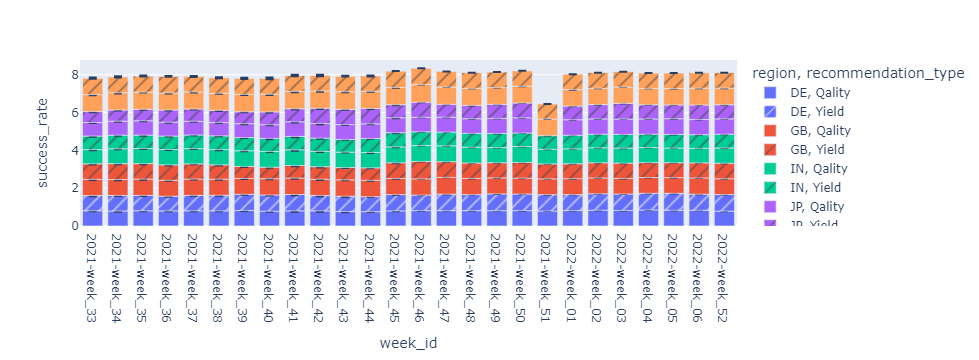

,week_id,region,recommendation_type,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range,success_CI_rang
0,2021-week_33,DE,Qality,0.59946,"(0.62145, 0.577475, 0.043974)",0.80556,"(0.823314, 0.787797, 0.035518)",0.031683
1,2021-week_33,DE,Yield,0.57447,"(0.618381, 0.530555, 0.087825)",0.80698,"(0.842034, 0.771929, 0.070106)",0.032404
2,2021-week_33,GB,Qality,0.74359,"(0.760122, 0.727058, 0.033064)",0.85448,"(0.867828, 0.841127, 0.026701)",0.031629
3,2021-week_33,GB,Yield,0.69318,"(0.733605, 0.652758, 0.080847)",0.82400,"(0.85738, 0.79062, 0.066761)",0.032291
4,2021-week_33,IN,Qality,0.43562,"(0.461016, 0.410217, 0.050799)",0.75068,"(0.772844, 0.728522, 0.044322)",0.031605
...,...,...,...,...,...,...,...,...
253,2022-week_52,IN,Yield,0.63136,"(0.653578, 0.609151, 0.044427)",0.72903,"(0.749494, 0.708564, 0.04093)",NaN
254,2022-week_52,JP,Qality,0.65666,"(0.674148, 0.639172, 0.034976)",0.81179,"(0.82619, 0.797398, 0.028792)",NaN
255,2022-week_52,JP,Yield,0.43820,"(0.490184, 0.386221, 0.103963)",0.74571,"(0.791336, 0.700093, 0.091243)",NaN
256,2022-week_52,US,Qality,0.77358,"(0.796344, 0.750826, 0.045519)",0.87760,"(0.895422, 0.859775, 0.035647)",NaN


In [112]:
df23 = rate_and_ci_groupby(ad_recs_annotated,'week_id','region', 'recommendation_type')


df23['success_CI_rang']  = (df22.success_CI_lower_upper_range.apply(lambda x: x[2]))

fig = px.bar(df23, x="week_id", y="success_rate", color="region",pattern_shape ='recommendation_type'  ,error_y = "success_CI_rang" )
fig.show()
df23


#### q24- Present WoW table/graph with success rate and CI (see image below) per region and rec provider

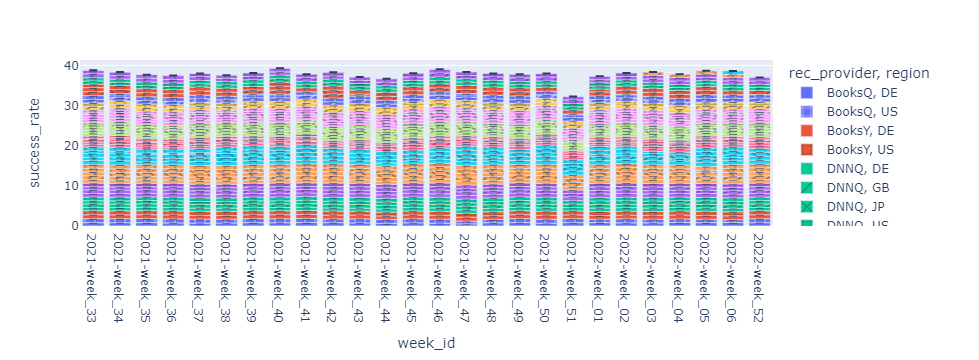

,week_id,region,rec_provider,sever_rate,sever_CI_lower_upper_range,success_rate,success_CI_lower_upper_range,success_CI_rang
0,2021-week_33,DE,BooksQ,0.00000,"(0.0, 0.0, 0.0)",0.83824,"(0.925759, 0.750711, 0.175048)",0.031683
1,2021-week_33,DE,BooksY,1.00000,"(1.0, 1.0, 0.0)",0.97500,"(1.023384, 0.926616, 0.096767)",0.032404
2,2021-week_33,DE,DNNQ,0.70776,"(0.732815, 0.68271, 0.050105)",0.82780,"(0.848602, 0.807006, 0.041595)",0.031629
3,2021-week_33,DE,DNNY,0.64706,"(0.716488, 0.577629, 0.138859)",0.90659,"(0.948872, 0.864315, 0.084556)",0.032291
4,2021-week_33,DE,ManualQ,0.14286,"(0.237968, 0.047746, 0.190223)",0.86538,"(0.958154, 0.772615, 0.185539)",0.031605
...,...,...,...,...,...,...,...,...
1207,2022-week_52,US,RuleBasedY,0.42857,"(0.476474, 0.380669, 0.095805)",0.52195,"(0.570303, 0.473599, 0.096704)",NaN
1208,2022-week_52,US,UserPopQ,0.61538,"(0.745146, 0.485623, 0.259523)",0.75926,"(0.873292, 0.645227, 0.228065)",NaN
1209,2022-week_52,US,UserPopY,0.74775,"(0.795483, 0.700013, 0.09547)",0.65094,"(0.703335, 0.598552, 0.104783)",NaN
1210,2022-week_52,US,XGBQ,0.68182,"(0.776483, 0.587154, 0.189329)",0.76344,"(0.849813, 0.677069, 0.172744)",NaN


In [111]:
df24 = rate_and_ci_groupby(ad_recs_annotated,'week_id','region', 'rec_provider')

df24['success_CI_rang']  = (df22.success_CI_lower_upper_range.apply(lambda x: x[2]))

fig = px.bar(df24, x="week_id", y="success_rate", pattern_shape="region" ,color= "rec_provider" ,error_y = "success_CI_rang" )
fig.show()
df24

#### q25- Which are the requester to which we succeed the most?

In [204]:
df25_a = ad_recs_annotated.groupby('requester').success_column_0_or_1.mean().sort_values()
df25_a = df25_a.to_frame().reset_index().rename(columns={ 'success_column_0_or_1': "secceed_accuarcy"})
df25_a = df25_a[df25_a.secceed_accuarcy == 1]


df25_b = ad_recs_annotated[ad_recs_annotated.success_column_0_or_1 == 1].groupby('requester').success_column_0_or_1.value_counts()
df25_b = df25_b.to_frame().rename(columns={ 'success_column_0_or_1': "secceed_value_counts"}).reset_index()
df25_b = df25_b.drop(columns = 'success_column_0_or_1')


df25= pd.merge(df25_a,df25_b,on=["requester"], how = 'left')
print(df25)
df25[df25.secceed_value_counts == df25.secceed_value_counts.max()]


       requester  secceed_accuarcy  secceed_value_counts
0  Marketo Japan               1.0                     1
1        FlagTap               1.0                     2
2        Derceto               1.0                     1
3            Cue               1.0                     4
4      Altammune               1.0                     5


,requester,secceed_accuarcy,secceed_value_counts
4,Altammune,1.0,5


#### q26- Which are the requester to which we produce the most critical defects?

In [216]:
df26_a = ad_recs_annotated.groupby('requester').is_sever.mean().sort_values()
df26_a = df26_a.to_frame().reset_index().rename(columns={ 'is_sever': "sever_accuarcy"})
df26_a = df26_a[df26_a.sever_accuarcy == 1]


df26_b = ad_recs_annotated[ad_recs_annotated.is_sever == 1].groupby('requester').is_sever.value_counts()
df26_b = df26_b.to_frame().rename(columns={ 'is_sever': "sever_value_counts"}).reset_index()
df26_b = df26_b.drop(columns = 'is_sever')

df26= pd.merge(df26_a,df26_b,on=["requester"], how = 'left')
print(df26)
df26[df26.sever_value_counts == df26.sever_value_counts.max()]

                requester  sever_accuarcy  sever_value_counts
0               Jun Group             1.0                   1
1         Joules Clothing             1.0                   6
2           Glory Medical             1.0                  23
3  PureSafe water systems             1.0                   1
4               Metranome             1.0                   1


,requester,sever_accuarcy,sever_value_counts
2,Glory Medical,1.0,23


#### q27- What is the overall success rate trend over time?

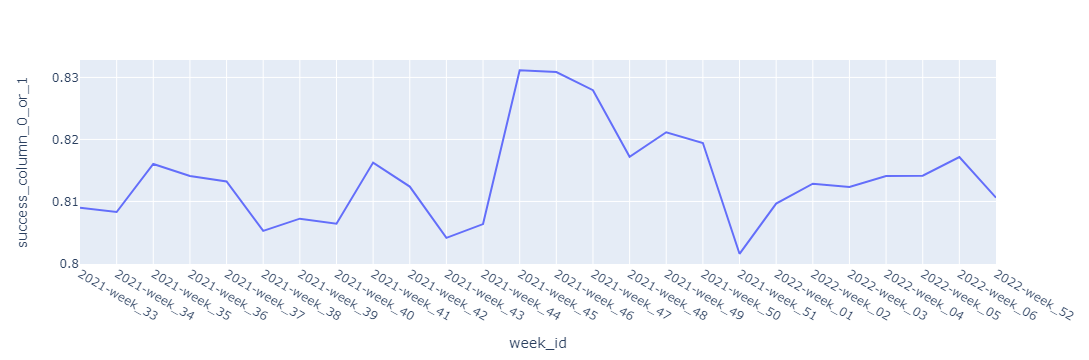

In [211]:
df27 = ad_recs_annotated.groupby('week_id').success_column_0_or_1.mean().reset_index()
fig27 = px.line(df27, x = 'week_id', y = 'success_column_0_or_1')
fig27.show()

#### q28- What is the overall sever defect rate trend over time?

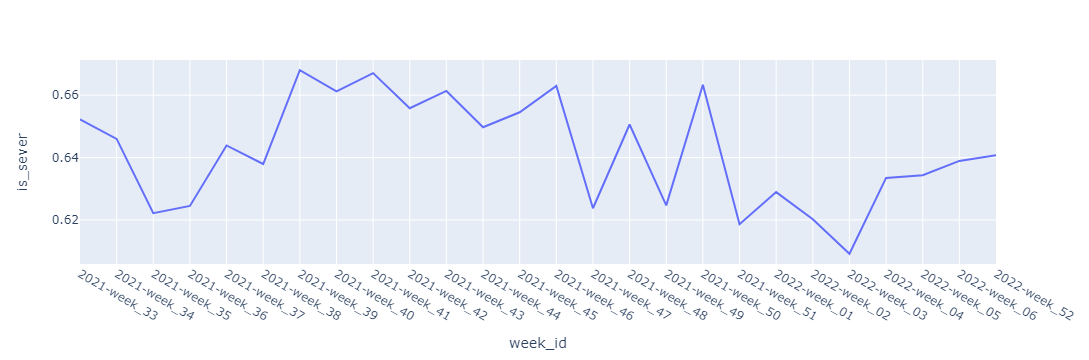

In [212]:
df27 = ad_recs_annotated.groupby('week_id').is_sever.mean().reset_index()
fig27 = px.line(df27, x = 'week_id', y = 'is_sever')
fig27.show()

#### q29- Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

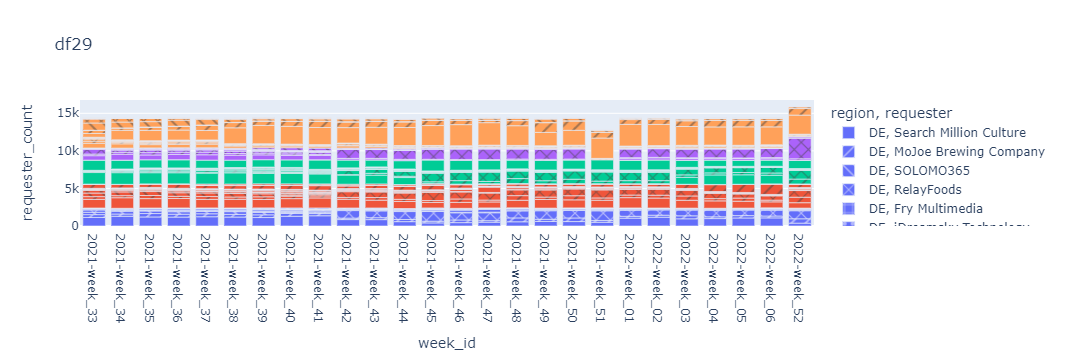

In [222]:
df29 = ad_recs_annotated.groupby(['week_id','region']).requester.value_counts().rename('requester_count').reset_index()
fig=px.bar(df29, x='week_id', y='requester_count',color='region',pattern_shape ='requester',  title='df29 ')
fig.show()

#### q30- Identify major traffic shape changes (addition/removal) of major clients

from the graph

#### q31- Preset a WoW graph showing the requests proportion per customer in each region (hint: use stacked bars), from it

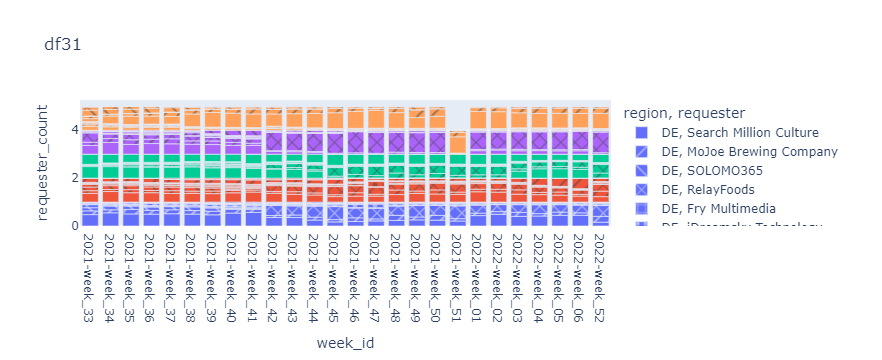

In [407]:
df31=ad_recs_annotated.groupby(['week_id','region']).requester.value_counts(normalize=True).rename('requester_count').reset_index()
fig=px.bar(df31, x='week_id', y='requester_count',color='region',pattern_shape ='requester', title='df31 ')
fig.show()

#### q32- : Identify major traffic shape changes (addition/removal) of major clients

from the graph

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [265]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]


['.ipynb_checkpoints',
 '2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv']

Your task is to reconstruct the dataset above. 

In [377]:
import os
weekly_files = os.listdir('data/weekly/')

i =0
for weekly_file in weekly_files:
    weekly_files[i] ='./data/weekly/' + weekly_file
    i = i+1
# I delete the file  ./data/weekly/2021_51_jp becuase it has no yield and qality files 

In [401]:
# I delete the file  ./data/weekly/2021_51_jp  becuase it has no yield and qality files
i = 1
datasets = []
while i < len(weekly_files)-2: 
    df1a = pd.read_csv(weekly_files[i])
    df1a['recommendation_type'] = 'qality'
    df1b =pd.read_csv( weekly_files[i+1])
    df1b['recommendation_type'] = 'yield'
    
    df1 = pd.concat([df1a, df1b])  
    df2 = pd.read_csv(weekly_files[i+2])
        
    df_merged = pd.merge(df2,df1,on=["region","ad_id", 'recommendation_type'], how = 'left')
    i=i+3
    datasets.append(df_merged)


In [404]:
#the system: pd.concat([datasets[0], datasets[1],datasets[2]]).....
dataset = reduce(lambda x,y: pd.concat([x, y]),datasets)


In [ ]:
dataset

,week_id,ad_id,requester,region,recommendation_type,rec_provider,is_success,is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Qality,DNNQ,NaN,NaN
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yield,DNNY,NaN,NaN
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Qality,DNNQ,NaN,NaN
3,2021-week_33,AD89608808,Search Million Culture,DE,Qality,BooksQ,NaN,NaN
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Qality,DNNQ,NaN,NaN
...,...,...,...,...,...,...,...,...
3993,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yield,DNNY,NaN,NaN
3994,2022-week_52,AD07C8XSMN,Fancy,US,Qality,RNNQ,NaN,NaN
3995,2022-week_52,AD096LRR88,Extreme DA,US,Yield,DNNY,NaN,NaN
3996,2022-week_52,AD08FWNFDO,RelayFoods,US,Qality,DNNQ,NaN,NaN


### Visualizations

Produce the following success rate graph per region:

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [ ]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)